# Amazon Rekognition 

In [1]:
import boto3
import io
from PIL import Image, ImageDraw, ExifTags, ImageColor

from matplotlib.pyplot import imshow
%matplotlib inline

def show_faces(photo,bucket):
     

    client=boto3.client('rekognition')

    # Load image from S3 bucket
    s3_connection = boto3.resource('s3')
    s3_object = s3_connection.Object(bucket,photo)
    s3_response = s3_object.get()

    stream = io.BytesIO(s3_response['Body'].read())
    image=Image.open(stream)
    
    #Call DetectFaces 
    response = client.detect_faces(Image={'S3Object': {'Bucket': bucket, 'Name': photo}},
        Attributes=['ALL'])

    imgWidth, imgHeight = image.size  
    draw = ImageDraw.Draw(image)  
                    

    # calculate and display bounding boxes for each detected face       
    print('Detected faces for ' + photo)    
    for faceDetail in response['FaceDetails']:
        print('The detected face is between ' + str(faceDetail['AgeRange']['Low']) 
              + ' and ' + str(faceDetail['AgeRange']['High']) + ' years old')
        
        box = faceDetail['BoundingBox']
        left = imgWidth * box['Left']
        top = imgHeight * box['Top']
        width = imgWidth * box['Width']
        height = imgHeight * box['Height']
                

        print('Left: ' + '{0:.0f}'.format(left))
        print('Top: ' + '{0:.0f}'.format(top))
        print('Face Width: ' + "{0:.0f}".format(width))
        print('Face Height: ' + "{0:.0f}".format(height))

        points = (
            (left,top),
            (left + width, top),
            (left + width, top + height),
            (left , top + height),
            (left, top)

        )
        draw.line(points, fill='#00d400', width=2)

        # Alternatively can draw rectangle. However you can't set line width.
        #draw.rectangle([left,top, left + width, top + height], outline='#00d400') 

    image.show()
    imshow(image)
    return len(response['FaceDetails'])

In [2]:
!aws s3 ls

2019-10-17 07:03:33 aws-deepracer-ef5d6995-11ca-4800-a5bf-694244303368
2019-09-06 03:55:51 cdktoolkit-stagingbucket-cfb7w421pk09
2019-09-06 03:55:51 cdktoolkit-stagingbucket-ohzm67k4ffb7
2019-09-17 04:42:44 cloud9-507922848584-sam-deployments-us-east-1
2019-08-01 18:08:18 cloudtrail-awslogs-507922848584-psq7khfg-isengard-do-not-delete
2019-08-16 07:23:22 codepipeline-us-east-2-531781646601
2019-11-07 18:11:10 debnsuma-ml-sagemaker
2019-10-14 08:03:04 deeplens-sagemaker-cd804e45-2557-44bf-889d-441b68c2593c
2019-08-01 18:23:18 do-not-delete-gatedgarden-audit-507922848584
2019-08-14 10:44:27 elasticbeanstalk-us-east-2-507922848584
2019-09-06 04:00:46 hello-cdk-1-myhelloconstructbucket0daec57e1-yiqg4smxb5bc
2019-09-06 04:00:46 hello-cdk-1-myhelloconstructbucket18d9883be-dg8s1cspliig
2019-09-06 04:00:47 hello-cdk-1-myhelloconstructbucket2c1da3656-12vb7vvjv834y
2019-09-06 04:00:46 hello-cdk-1-myhelloconstructbucket398a5de67-1qmaqal6sde8m
2019-10-25 13:19:02 my-ai-bucket-suman
2019-10-11 18:0

In [3]:
bucket='my-ai-bucket-suman'
!aws s3 ls s3://{bucket}

2019-11-16 10:41:10    3355000 photo1.jpg
2019-11-16 10:42:09    5486004 photo2.jpg
2019-11-16 12:21:02      35019 photo3.jpeg


Detected faces for photo3.jpeg
The detected face is between 22 and 34 years old
Left: 189
Top: 90
Face Width: 125
Face Height: 183
The detected face is between 21 and 33 years old
Left: 65
Top: 97
Face Width: 125
Face Height: 177
The detected face is between 22 and 34 years old
Left: 564
Top: 114
Face Width: 122
Face Height: 171
The detected face is between 30 and 46 years old
Left: 325
Top: 62
Face Width: 111
Face Height: 181
The detected face is between 22 and 34 years old
Left: 448
Top: 101
Face Width: 109
Face Height: 173
faces detected: 5


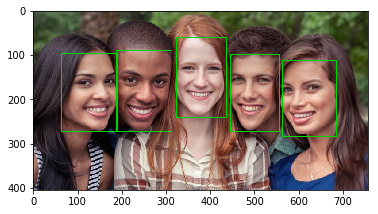

In [4]:
photo='photo3.jpeg'

faces_count=show_faces(photo,bucket)
print("faces detected: " + str(faces_count))

# Amazon Translate

In [5]:
import boto3

def translate_my_text(text, sourceLang, targetLang):
    translate = boto3.client(service_name='translate',use_ssl=True)

    result = translate.translate_text(Text=text, 
                SourceLanguageCode=sourceLang, TargetLanguageCode=targetLang)
    print('TranslatedText: ' + result.get('TranslatedText'))
    print('SourceLanguageCode: ' + result.get('SourceLanguageCode'))
    print('TargetLanguageCode: ' + result.get('TargetLanguageCode'))

lang_lookup = {'Arabic': 'ar',
 'Chinese-Simplified': 'zh',
 'Chinese-Traditional': 'zh-TW',
 'Czech': 'cs',
 'Danish': 'da',
 'Dutch': 'nl',
 'English': 'en',
 'Finnish': 'fi',
 'French': 'fr',
 'German': 'de',
 'Hebrew': 'he',
 'Indonesian': 'id',
 'Italian': 'it',
 'Japanese': 'ja',
 'Korean': 'ko',
 'Polish': 'pl',
 'Portuguese': 'pt',
 'Russian': 'ru',
 'Spanish': 'es',
 'Swedish': 'sv',
 'Turkish': 'tr',
 'Hindi': 'hi'}


In [6]:
text = "Hi, My name is Suman, thanks for coming"
sourceL = "English"
targetL = "Hindi"

targetLang = lang_lookup[targetL]
sourceLang = lang_lookup[sourceL]

translate_my_text(text=text, sourceLang=sourceLang, targetLang=targetLang)


TranslatedText: हाय, मेरा नाम सुमन है, आने के लिए धन्यवाद
SourceLanguageCode: en
TargetLanguageCode: hi


# Amazon Comprehend 


In [7]:
import boto3
import json
from pprint import pprint as pp

def get_sentiment(data):
    
    comprehend = boto3.client(service_name='comprehend')

    print('Calling DetectSentiment')
    raw_data = json.dumps(comprehend.detect_sentiment(Text=data, LanguageCode='en'), sort_keys=True, indent=4)
    raw_data = json.loads(raw_data)
    sentiment = raw_data["Sentiment"]
    sentimentScore = raw_data["SentimentScore"]
    
    print(f"Sentiment is : {sentiment}")
    print("Sentiment score is :")
    pp(sentimentScore)



In [8]:
text = "Thanks for coming, its a pleasure to meet you all amazing people"
get_sentiment(text)

Calling DetectSentiment
Sentiment is : POSITIVE
Sentiment score is :
{'Mixed': 1.627374558665906e-06,
 'Negative': 4.204674405627884e-05,
 'Neutral': 0.0010675775120034814,
 'Positive': 0.9988887906074524}


In [9]:
comprehend = boto3.client(service_name='comprehend')
text = 'It was get to be here in Pune today, I love Amazon and more that that I love you all'

print('Calling DetectEntities')
print(json.dumps(comprehend.detect_entities(Text=text, LanguageCode='en'),
                 sort_keys=True, indent=4))
print('End of DetectEntities\n')

Calling DetectEntities
{
    "Entities": [
        {
            "BeginOffset": 25,
            "EndOffset": 29,
            "Score": 0.9999998807907104,
            "Text": "Pune",
            "Type": "LOCATION"
        },
        {
            "BeginOffset": 30,
            "EndOffset": 35,
            "Score": 0.9997710585594177,
            "Text": "today",
            "Type": "DATE"
        },
        {
            "BeginOffset": 44,
            "EndOffset": 50,
            "Score": 0.9999945163726807,
            "Text": "Amazon",
            "Type": "ORGANIZATION"
        }
    ],
    "ResponseMetadata": {
        "HTTPHeaders": {
            "content-length": "296",
            "content-type": "application/x-amz-json-1.1",
            "date": "Mon, 25 Nov 2019 06:24:33 GMT",
            "x-amzn-requestid": "8fef982f-cb1b-433f-8325-fdab7f44ce28"
        },
        "HTTPStatusCode": 200,
        "RequestId": "8fef982f-cb1b-433f-8325-fdab7f44ce28",
        "RetryAttempts": 0
    }